In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\James\Downloads\google-project-sunroof\sunroof_solar_potential_by_censustract.csv")
pd.set_option('display.max_columns', 500)

In [3]:
df.head()

,carbon_offset_metric_tons,count_qualified,existing_installs_count,install_size_kw_buckets,kw_median,kw_total,lat_avg,lat_max,lat_min,lng_avg,lng_max,lng_min,number_of_panels_e,number_of_panels_f,number_of_panels_median,number_of_panels_n,number_of_panels_s,number_of_panels_total,number_of_panels_w,percent_covered,percent_qualified,region_name,state_name,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_kw_threshold_avg,yearly_sunlight_kwh_median,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w
0,2159.887389,586,12,[[0171][5231][10114][1545][2016][252][352][451...,7.25,5219.00,34.267040,34.272362,34.261761,-118.432716,-118.425262,-118.440880,2964,6574,29.0,3159,4352,20876.0,3827,98.121387,86.303387,6037104401,California,1.014756e+06,2.539152e+06,1285.247909,10863.017950,1.075291e+06,1.760043e+06,7.922383e+06,1.533140e+06
1,11392.316227,369,4,[[060][550][1024][1518][2023][2515][3012][3515...,28.00,28391.25,43.156368,43.162289,43.150970,-77.607040,-77.595558,-77.620216,2760,102635,112.0,693,4578,113565.0,2899,98.623853,85.813953,36055009400,New York,7.338827e+05,2.815855e+07,947.750000,30689.598633,1.739810e+05,1.342966e+06,3.117606e+07,7.666855e+05
2,6902.286133,788,3,[[0364][5313][1057][1513][207][258][305][351][...,5.25,7352.25,42.277794,42.288818,42.266918,-89.066589,-89.056992,-89.085197,3841,9963,21.0,535,10649,29409.0,4421,99.359431,56.446991,17201000700,Illinois,1.024630e+06,2.850205e+06,980.050000,5823.500452,1.342642e+05,3.155397e+06,8.337565e+06,1.173068e+06
3,3238.933474,432,1,[[0320][567][1020][1512][251][302][351][401][4...,3.25,3598.25,40.422962,40.428940,40.418259,-79.993729,-79.987312,-80.003838,4920,5001,13.0,299,2529,14393.0,1644,98.687664,38.297872,42003180300,Pennsylvania,1.203715e+06,1.432569e+06,948.600000,3724.817041,7.318190e+04,7.604248e+05,3.912445e+06,4.425539e+05
4,6111.873688,827,32,[[0125][5219][10227][15124][2039][2520][3015][...,11.50,15098.50,33.844044,33.847179,33.839771,-117.933113,-117.922440,-117.941673,5933,31555,46.0,5146,8933,60394.0,8827,100.000000,90.382514,6059086602,California,2.070519e+06,1.183461e+07,1260.550000,16996.447681,1.691435e+06,3.551939e+06,2.241812e+07,3.269615e+06


In [4]:
df.dropna(inplace=True)
#create feature to get average carbon offset for a qualified building
df['unit_offset'] = df['carbon_offset_metric_tons']/df['count_qualified']

#create a feature that determines the average number of panels per building
df['average_panels'] = df['number_of_panels_total']/df['count_qualified']
df['average_panels'] = df['average_panels'].astype(int)

cols_to_drop = ['carbon_offset_metric_tons', 'install_size_kw_buckets',
               'lat_min', 'lat_max', 'lng_min', 'lng_max', 'percent_covered',
               'percent_qualified', 'region_name', 'state_name',
                'yearly_sunlight_kwh_kw_threshold_avg', 'count_qualified', 
               'existing_installs_count', 'yearly_sunlight_kwh_median', 'kw_median',
               'kw_total']
df.drop(cols_to_drop, axis=1, inplace=True)

In [5]:
df.head()

,lat_avg,lng_avg,number_of_panels_e,number_of_panels_f,number_of_panels_median,number_of_panels_n,number_of_panels_s,number_of_panels_total,number_of_panels_w,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w,unit_offset,average_panels
0,34.267040,-118.432716,2964,6574,29.0,3159,4352,20876.0,3827,1.014756e+06,2.539152e+06,1.075291e+06,1.760043e+06,7.922383e+06,1.533140e+06,3.685815,35
1,43.156368,-77.607040,2760,102635,112.0,693,4578,113565.0,2899,7.338827e+05,2.815855e+07,1.739810e+05,1.342966e+06,3.117606e+07,7.666855e+05,30.873486,307
2,42.277794,-89.066589,3841,9963,21.0,535,10649,29409.0,4421,1.024630e+06,2.850205e+06,1.342642e+05,3.155397e+06,8.337565e+06,1.173068e+06,8.759246,37
3,40.422962,-79.993729,4920,5001,13.0,299,2529,14393.0,1644,1.203715e+06,1.432569e+06,7.318190e+04,7.604248e+05,3.912445e+06,4.425539e+05,7.497531,33
4,33.844044,-117.933113,5933,31555,46.0,5146,8933,60394.0,8827,2.070519e+06,1.183461e+07,1.691435e+06,3.551939e+06,2.241812e+07,3.269615e+06,7.390416,73


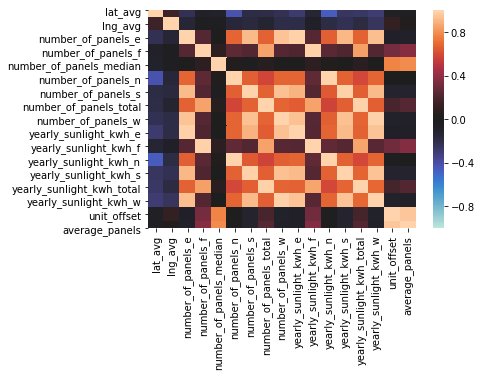

In [6]:
corr = df.corr()

sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0
)

# Determining how to stack my models

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### First model, predicts yearly sunlight total

In [8]:
features = ['lat_avg', 'lng_avg', 'average_panels']
target = 'yearly_sunlight_kwh_total'

dftest = df[features].copy()
dftest[target] = df[target].copy()


In [9]:
dftest.head()

,lat_avg,lng_avg,average_panels,yearly_sunlight_kwh_total
0,34.267040,-118.432716,35,7.922383e+06
1,43.156368,-77.607040,307,3.117606e+07
2,42.277794,-89.066589,37,8.337565e+06
3,40.422962,-79.993729,33,3.912445e+06
4,33.844044,-117.933113,73,2.241812e+07


In [10]:
train, test = train_test_split(dftest, random_state=13, train_size=.8, test_size=.2)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [11]:
lay1_model = RandomForestRegressor(n_estimators=150, min_samples_leaf=3,
                              n_jobs=-1, random_state=13)

In [12]:
lay1_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                      oob_score=False, random_state=13, verbose=0,
                      warm_start=False)

In [13]:
y_pred = lay1_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mea for the Random Forest is: {mae}')
print(f'The r^2 score for the Random Forest is: {r2}')

The mea for the Random Forest is: 10412471.972081
The r^2 score for the Random Forest is: 0.3571517864486988


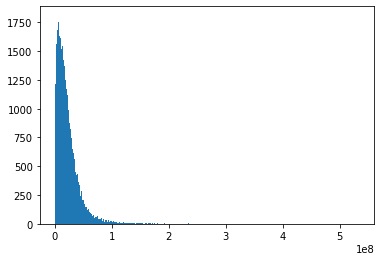

In [14]:
plt.hist(df['yearly_sunlight_kwh_total'], bins=500);

In [15]:
#remove highest 2% and lowest 1% yearly sunlight
bottom = dftest.sort_values(by='yearly_sunlight_kwh_total')[:486].index
top = dftest.sort_values(by='yearly_sunlight_kwh_total')[47689:].index

dftest.drop(bottom,inplace=True)
dftest.drop(top, inplace=True)
dftest.shape

(47203, 4)

In [16]:
train, test = train_test_split(dftest, random_state=13, train_size=.8, test_size=.2)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [17]:
lay1_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                      oob_score=False, random_state=13, verbose=0,
                      warm_start=False)

In [20]:
y_pred = lay1_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the Random Forest is: {mae}')
print(f'The r^2 score for the Random Forest is: {r2}')

The mae for the Random Forest is: 8373953.335417818
The r^2 score for the Random Forest is: 0.4308147559185903


In [111]:
import pickle
filename = 'sunlight_total.pkl'
pickle.dump(lay1_model, open(filename, 'wb'))

# Next Step: predict sunlight for each direction

In [78]:
features = ['lat_avg', 'lng_avg', 'average_panels',
             'yearly_sunlight_kwh_total']
yearly_sun = ['yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_e', 
             'yearly_sunlight_kwh_s', 'yearly_sunlight_kwh_w',
             'yearly_sunlight_kwh_f']
lev2_features = features + yearly_sun
lev2_df = df[lev2_features].copy()
lev2_df.head()

,lat_avg,lng_avg,average_panels,yearly_sunlight_kwh_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_e,yearly_sunlight_kwh_s,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f
0,34.267040,-118.432716,35,7.922383e+06,1.075291e+06,1.014756e+06,1.760043e+06,1.533140e+06,2.539152e+06
1,43.156368,-77.607040,307,3.117606e+07,1.739810e+05,7.338827e+05,1.342966e+06,7.666855e+05,2.815855e+07
2,42.277794,-89.066589,37,8.337565e+06,1.342642e+05,1.024630e+06,3.155397e+06,1.173068e+06,2.850205e+06
3,40.422962,-79.993729,33,3.912445e+06,7.318190e+04,1.203715e+06,7.604248e+05,4.425539e+05,1.432569e+06
4,33.844044,-117.933113,73,2.241812e+07,1.691435e+06,2.070519e+06,3.551939e+06,3.269615e+06,1.183461e+07


In [79]:
bottom = lev2_df.sort_values(by='yearly_sunlight_kwh_total')[:486].index
top = lev2_df.sort_values(by='yearly_sunlight_kwh_total')[47689:].index

lev2_df.drop(bottom,inplace=True)
lev2_df.drop(top, inplace=True)
train, test = train_test_split(lev2_df, random_state=13, train_size=.8, test_size=.2)

## Train a model for each direction

In [113]:
target = 'yearly_sunlight_kwh_n'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [120]:
model = RandomForestRegressor(n_estimators=150, min_samples_leaf=3, random_state=13, n_jobs=-1)

In [121]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 392621.01448529697
The r^2 score for the model is: 0.7721586669303104


In [122]:
filename = 'sunlight_n.pkl'
pickle.dump(model, open(filename, 'wb'))

### Same thing, but for other directions

In [92]:
target = 'yearly_sunlight_kwh_e'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, min_samples_leaf=2, random_state=13, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 684667.4755900083
The r^2 score for the model is: 0.8316660466480176


In [93]:
filename = 'sunlight_e.pkl'
pickle.dump(model, open(filename, 'wb'))

In [98]:
target = 'yearly_sunlight_kwh_s'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, min_samples_leaf=3, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 918636.7178070124
The r^2 score for the model is: 0.8828412026953386


In [99]:
filename = 'sunlight_s.pkl'
pickle.dump(model, open(filename, 'wb'))

In [102]:
target = 'yearly_sunlight_kwh_w'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, min_samples_leaf=3, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 761627.6851265306
The r^2 score for the model is: 0.865852836487524


In [103]:
filename = 'sunlight_w.pkl'
pickle.dump(model, open(filename, 'wb'))

In [108]:
target = 'yearly_sunlight_kwh_f'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=200, min_samples_leaf=2, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 2061647.9102834074
The r^2 score for the model is: 0.8926100738815207


In [109]:
filename = 'sunlight_f.pkl'
pickle.dump(model, open(filename, 'wb'))

## Last Layer, Predict number of panels

In [112]:
drop_cols = ['number_of_panels_total', 'unit_offset']
df2 = df.drop(drop_cols, axis=1)

#remove outliers
df2.drop(bottom,inplace=True)
df2.drop(top, inplace=True)

In [123]:
train, test = train_test_split(df2, random_state=13, train_size=.8, test_size=.2)

In [126]:
target = 'number_of_panels_n'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=100, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 72.35880838894185
The r^2 score for the model is: 0.9983054445040012


In [127]:
filename = 'panels_n.pkl'
pickle.dump(model, open(filename, 'wb'))

In [131]:
target = 'number_of_panels_e'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 165.20473678635736
The r^2 score for the model is: 0.9979940203067978


In [132]:
filename = 'panels_e.pkl'
pickle.dump(model, open(filename, 'wb'))

In [133]:
target = 'number_of_panels_w'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 210.74242841506899
The r^2 score for the model is: 0.997904335599916


In [134]:
filename = 'panels_w.pkl'
pickle.dump(model, open(filename, 'wb'))

In [135]:
target = 'number_of_panels_s'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 285.56456378208526
The r^2 score for the model is: 0.9976952586292188


In [136]:
filename = 'panels_s.pkl'
pickle.dump(model, open(filename, 'wb'))

In [137]:
target = 'number_of_panels_f'

X_train = train[lev2_features]
y_train = train[target]

X_test = test[lev2_features]
y_test = test[target]

model = RandomForestRegressor(n_estimators=150, random_state=13, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'The mae for the model is: {mae}')
print(f'The r^2 score for the model is: {r2}')

The mae for the model is: 433.7787070578682
The r^2 score for the model is: 0.9988580388588094


In [138]:
filename = 'panels_s.pkl'
pickle.dump(model, open(filename, 'wb'))

In [32]:
#feature engineering
panels_cols = ['number_of_panels_n', 'number_of_panels_e',
               'number_of_panels_s', 'number_of_panels_w',
               'number_of_panels_f']
yearly_sun = ['yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_e', 
             'yearly_sunlight_kwh_s', 'yearly_sunlight_kwh_w',
             'yearly_sunlight_kwh_f']
roof_dir = ['n', 'e', 's', 'w', 'f']
for col in panels_cols:
    ind = panels_cols.index(col)
    sun = yearly_sun[ind]
    name = 'yearly_unit_prod_' + roof_dir[ind]
    df[name] = sun/col
    df.drop([sun,col], axis=1, inplace=True)
    
df.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'